In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [32]:
data = pd.read_csv('datasets/Mall_Customers.csv', index_col = 0)

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [33]:
# Pour cet exercice, on veut travailler en 2D, on retire donc les colonnes Genre et Age
data.drop('Gender', axis=1, inplace=True)
data.drop('Age', axis=1, inplace=True)

data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [34]:
# On veut maintenant mélanger la donnée avec la fonction sample
# frac nous assure que les points originaux sont préservés
data = data.sample(frac=1)

In [35]:
# On implemente un KMean algorithme en lui indiquant qu'on veut trouver 2 clusters dans cette données
# Ici on ne split pas la donnée, en effet, on est en mode unsupervised donc pas de slipt pour train
# et pour test. Il n'y a pas de bonnes ou de mauvaises réponses on donne tout le dataset et on ressort
# avec des catégories
k_means = KMeans(n_clusters=2)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
# Résultat du Kmean : 0 ou 1 représente les 2 catégory qu'a trouver le KMean pour chaque data
k_means.labels_

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0])

In [37]:
np.unique(k_means.labels_)

array([0, 1])

In [38]:
# On peut obtenir les 2 centres du K means comme ceco
centers = k_means.cluster_centers_

centers

array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]])

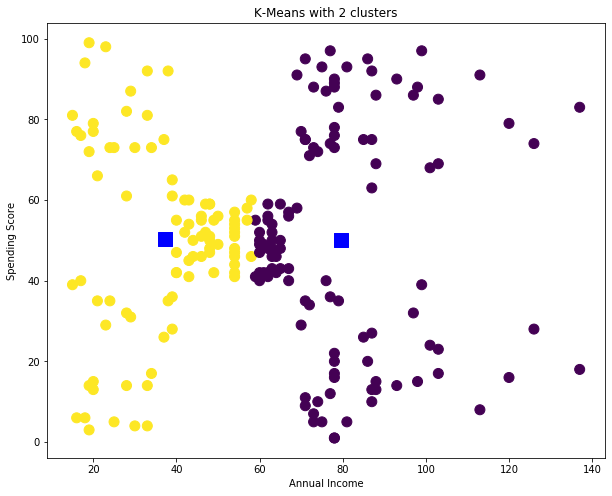

In [39]:
# Maintenant qu'on a classifié tout ca on va pouvoir avoir une représentation
# Graphique car on est en 2 dimensions

plt.figure(figsize=(10,8))

plt.scatter(data['Annual Income (k$)'],
           data['Spending Score (1-100)'],
           c = k_means.labels_,s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

In [40]:
# Afin de mesurer le score de notre modèle, l'un des paramètres et le silhoutte_score
# Cela mesure combien un point est similaire aux autres points de son cluster et different 
# des points qui ne font pas parti de son cluster

# Le score 0.29 est assez bas cela signifie que nos points sont toujours très différents.
from sklearn.metrics import silhouette_score

score = silhouette_score( data, k_means.labels_)

print("Score = ", score)

Score =  0.29689691625030085


In [41]:
# On va donc rajouter des clusters
k_means = KMeans(n_clusters=5)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
# On a maintenant 5 clusters
np.unique(k_means.labels_)

array([0, 1, 2, 3, 4])

In [43]:
# On peut obtenir les 5 centres du K means comme ceco
centers = k_means.cluster_centers_

centers

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

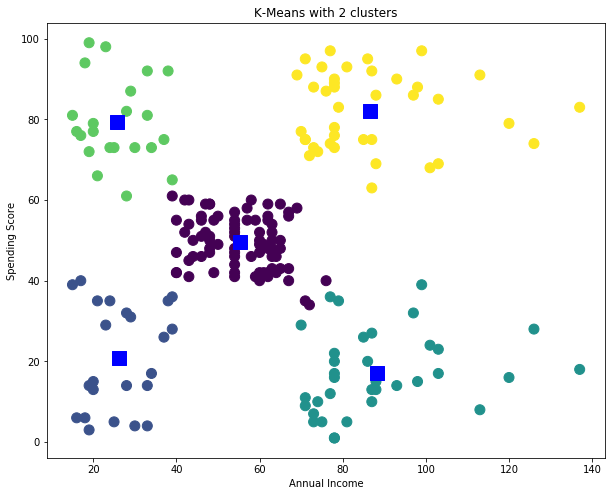

In [44]:
# On réaffiche notre data avec ces 5 centroids

plt.figure(figsize=(10,8))

plt.scatter(data['Annual Income (k$)'],
           data['Spending Score (1-100)'],
           c = k_means.labels_,s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

In [45]:
# Intuitivement on voit que les clusters sont beaucoup mieux ici

# 0.55 le score est bien meilleur
score = silhouette_score( data, k_means.labels_)

print("Score = ", score)

Score =  0.553931997444648
